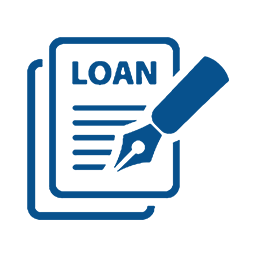

# Importing libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Read train file as pandas dataframe

In [ ]:
train = pd.read_csv("../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv")

In [ ]:
train.head()

Let's see some basic statistics

In [ ]:
train.describe()

We can observe some null values in LoanAmount, Loan_Amount_Term, Credit_History

# EDA

In [ ]:
train.drop("Loan_ID", axis = 1, inplace = True) #drop Loan_ID

If we check every column for NaN values, you will see some NaN values in object type columns also, for instance in Gender or Married

In [ ]:
train["Gender"].unique()

So, XGBClassifier can deal with such missing values, we just need to replace them with 0's. If you want to drop all such rows with missing values, later when trying to validate the model on test file, you will find missing values in columns, hence your model will be not that good dealing with missing values.

In [ ]:
train.fillna(0, inplace = True)

In [ ]:
train.describe()

Check the types of all columns, so that there is no problems

In [ ]:
train.dtypes

We are all good! Now we need to apply one-hot encoding. Creating multiple columns with 1/0 values. We select only categorical columns

In [ ]:
train_encoded = pd.get_dummies(train, columns = ["Dependents", "Property_Area", "Gender", "Married", "Education", "Self_Employed"])

In [ ]:
train_encoded.head()

Now, we can see 25 columns, and newly created columns have either 0 or 1, meaning for instance: **Gender_Female = 1** => this instance is a female.

In [ ]:
train_encoded.columns #to see list of column names

Replace empty spaces in column names so that XGBClassifier would work correctly

In [ ]:
train_encoded.columns = train_encoded.columns.str.replace(" ", "_")
train_encoded.columns

Now, we see two equal column names: "Dependents_0", replace first one by "Dependents_00"

In [ ]:
train_encoded.columns.values[6] = "Dependents_00"
train_encoded.columns

We can use SelectKBest to choose only specific columns, however after cheking k = 2,3,5,10,15, I came to the conclusion that we need to use all columns. Because the accuracy drops a bit for every k.

In [ ]:
#from sklearn.feature_selection import SelectKBest, chi2, f_classif
#features = pd.DataFrame(SelectKBest(f_classif, k=15).fit_transform(train_encoded.drop("Loan_Status", axis = 1), train_encoded["Loan_Status"]))

In [ ]:
features = train_encoded.drop("Loan_Status", axis = 1)
labels = train_encoded["Loan_Status"]

In [ ]:
features.head()

In [ ]:
labels.head()

In [ ]:
labels.replace("N", "0", inplace = True)
labels.replace("Y", "1", inplace = True)
labels = labels.astype(int)

# Models testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, stratify = labels)

In [ ]:
model = XGBClassifier(objective = "binary:logistic", missing = None)

In [ ]:
model.fit(X_train, y_train, verbose = True,
         early_stopping_rounds = 10,
         eval_metric = "aucpr",
         eval_set = [(X_test, y_test)])

In [ ]:
predictions = model.predict(X_test)
accuracy_score(predictions, y_test) #on the train dataset

In [ ]:
model2 = DecisionTreeClassifier() # testing for DecisionTreeClassifier
model2.fit(X_train, y_train)
predictions2 = model2.predict(X_test)
accuracy_score(predictions2, y_test)

In [ ]:
model3 = RandomForestClassifier() # testing for RandomForestClassifier
model3.fit(X_train, y_train)
predictions3 = model3.predict(X_test)
accuracy_score(predictions3, y_test)

In [ ]:
model4 = LogisticRegression() # tesing for LogisticRegression
model4.fit(X_train, y_train)
predictions4 = model4.predict(X_test)
accuracy_score(predictions4, y_test)

In [ ]:
model5 = KNeighborsClassifier(16) # KNN, tested from 1 to 200, the best result is 16
model5.fit(X_train, y_train)
predictions5 = model5.predict(X_test)
accuracy_score(predictions5, y_test)

Let's download the test dataset and then check its accuracy on https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii

In [ ]:
test = pd.read_csv("../input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv")
ID = test["Loan_ID"]
test.drop("Loan_ID", axis = 1, inplace = True)
test.fillna(0, inplace = True)
test_encoded = pd.get_dummies(test, columns = ["Dependents", "Property_Area", "Gender", "Married", "Education", "Self_Employed"])
test_encoded.columns = test_encoded.columns.str.replace(" ", "_")
test_encoded.columns.values[5] = "Dependents_00"
test_encoded.insert(16, "Married_0", 0)
test_encoded.head()

In [ ]:
test_predictions = model.predict(test_encoded)
test_predictions = pd.DataFrame(test_predictions, columns = ["Loan_Status"])
test_predictions["Loan_ID"] = ID
test_predictions["Loan_Status"].replace(0, "N", inplace = True)
test_predictions["Loan_Status"].replace(1, "Y", inplace = True)
final_predictions = test_predictions[["Loan_ID", "Loan_Status"]]
final_predictions.to_csv("./final_submission.csv",index = False)
final_predictions.head()

In [ ]:
test_predictions2 = model2.predict(test_encoded)
test_predictions2 = pd.DataFrame(test_predictions2, columns = ["Loan_Status"])
test_predictions2["Loan_ID"] = ID
test_predictions2["Loan_Status"].replace(0, "N", inplace = True)
test_predictions2["Loan_Status"].replace(1, "Y", inplace = True)
final_predictions2 = test_predictions2[["Loan_ID", "Loan_Status"]]
final_predictions2.to_csv("./final_submission2.csv",index = False)
final_predictions2.head()

In [ ]:
test_predictions3 = model3.predict(test_encoded)
test_predictions3 = pd.DataFrame(test_predictions3, columns = ["Loan_Status"])
test_predictions3["Loan_ID"] = ID
test_predictions3["Loan_Status"].replace(0, "N", inplace = True)
test_predictions3["Loan_Status"].replace(1, "Y", inplace = True)
final_predictions3 = test_predictions3[["Loan_ID", "Loan_Status"]]
final_predictions3.to_csv("./final_submission3.csv",index = False)
final_predictions3.head()

In [ ]:
test_predictions4 = model4.predict(test_encoded)
test_predictions4 = pd.DataFrame(test_predictions4, columns = ["Loan_Status"])
test_predictions4["Loan_ID"] = ID
test_predictions4["Loan_Status"].replace(0, "N", inplace = True)
test_predictions4["Loan_Status"].replace(1, "Y", inplace = True)
final_predictions4 = test_predictions4[["Loan_ID", "Loan_Status"]]
final_predictions4.to_csv("./final_submission4.csv",index = False)
final_predictions4.head()

In [ ]:
test_predictions5 = model5.predict(test_encoded)
test_predictions5 = pd.DataFrame(test_predictions5, columns = ["Loan_Status"])
test_predictions5["Loan_ID"] = ID
test_predictions5["Loan_Status"].replace(0, "N", inplace = True)
test_predictions5["Loan_Status"].replace(1, "Y", inplace = True)
final_predictions5 = test_predictions5[["Loan_ID", "Loan_Status"]]
final_predictions5.to_csv("./final_submission5.csv",index = False)
final_predictions5.head()

After submission of 4 solutions to the https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#MySubmissions. I got the best 79% accuracy on XGBClassifier. That's great for the beginning

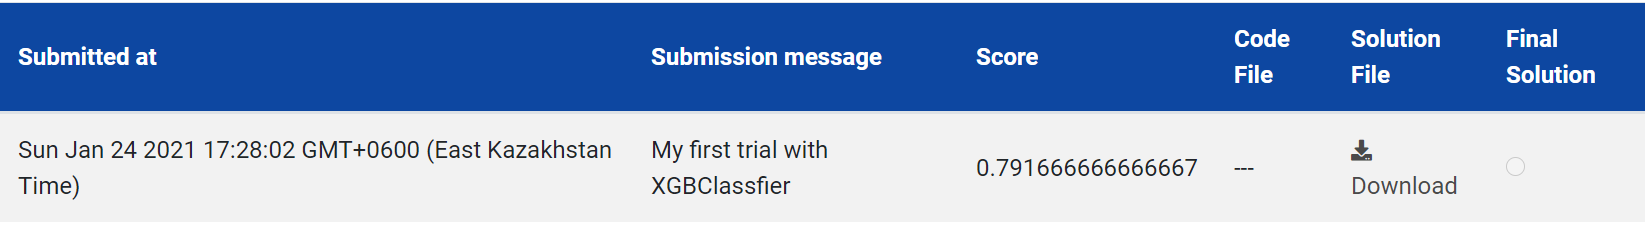